In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,603390,0,0,76561198121921849,202,2,1,2.3,"October 29, 2021",─┼───
1,603390,0,0,ninja8tyu,2,1,1,89.6,"October 22, 2021",I enjoy the story and discovering and unraveli...
2,603390,0,0,76561198064983931,417,264,1,67.2,"October 20, 2021",NaN
3,603390,0,0,ZeFoxIzMe,217,7,1,7.8,"October 18, 2021",An excellent game with a beautiful style. Grea...
4,603390,2,0,Card_Czar,180,12,1,62.9,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,2.3,"October 29, 2021",─┼───
1,0,0,1,89.6,"October 22, 2021",I enjoy the story and discovering and unraveli...
2,0,0,1,67.2,"October 20, 2021",NaN
3,0,0,1,7.8,"October 18, 2021",An excellent game with a beautiful style. Grea...
4,2,0,1,62.9,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 29, 2021",─┼───,0,0,2.3,1
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1
2,"October 20, 2021",NaN,0,0,67.2,1
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1
5,"October 16, 2021","Really cool art style, very relaxing to play.....",0,0,2.9,1
6,"October 3, 2021",Great game! Will do a complete review once I c...,2,1,65.8,1
7,"September 20, 2021",This game is amazing.,0,0,20.9,1
8,"September 19, 2021","(after playing for 10 minutes)""Oh FFS... this ...",5,0,0.2,-1
9,"September 4, 2021",“We expect to be in Early Access for about one...,4,1,20.8,-1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  179 non-null    object 
 1   Review_Text     178 non-null    object 
 2   Num_Helpful     179 non-null    int64  
 3   Num_Funny       179 non-null    int64  
 4   Hours_Played    179 non-null    float64
 5   Recommend       179 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 8.5+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30752/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 29, 2021",─┼───,0,0,2.3,1,1635465600
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1,1634860800
2,"October 20, 2021",NaN,0,0,67.2,1,1634688000
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1,1634515200
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1,1634342400


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30752/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",─┼───,0,0,2.3,1,1635465600,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1,1634860800,2703
2,"October 20, 2021",NaN,0,0,67.2,1,1634688000,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1,1634515200,2702
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1,1634342400,2702


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",─┼───,0,0,2.3,1,1635465600,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1,1634860800,2703
2,"October 20, 2021",NaN,0,0,67.2,1,1634688000,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1,1634515200,2702
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1,1634342400,2702


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2704,"October 29, 2021",─┼───
1,2703,"October 22, 2021",I enjoy the story and discovering and unraveli...
2,2702,"October 20, 2021",NaN
3,2702,"October 18, 2021",An excellent game with a beautiful style. Grea...
4,2702,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2588,"August 10, 2019",9
1,2588,"August 11, 2019",6
2,2588,"August 12, 2019",3
3,2588,"August 13, 2019",3
4,2588,"August 14, 2019",1
...,...,...,...
105,2702,"October 16, 2021",2
106,2702,"October 18, 2021",1
107,2702,"October 20, 2021",1
108,2703,"October 22, 2021",1


<AxesSubplot:>

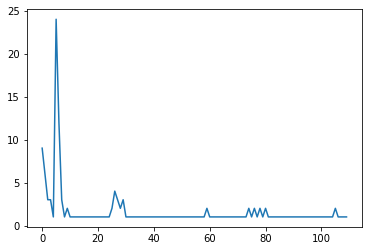

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

179

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.6272727272727272

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2588,58
1,2589,6
2,2590,2
3,2591,1
4,2592,1
...,...,...
64,2698,2
65,2700,1
66,2702,4
67,2703,1


<AxesSubplot:>

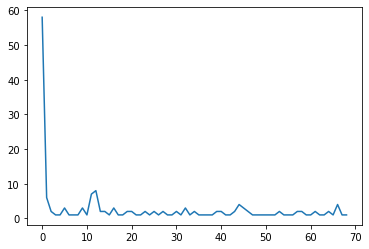

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

179

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

2.5942028985507246

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",─┼───,0,0,2.3,1,1635465600,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1,1634860800,2703
2,"October 20, 2021",NaN,0,0,67.2,1,1634688000,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1,1634515200,2702
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1,1634342400,2702


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2588,798
1,2589,24
2,2590,5
3,2591,5
4,2592,4
...,...,...
64,2698,5
65,2700,2
66,2702,2
67,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2588,123,0,1.5,13.758621
2589,7,1,3.5,4.000000
2590,3,2,2.5,2.500000
2591,5,5,5.0,5.000000
2592,4,4,4.0,4.000000
...,...,...,...,...
2698,5,0,2.5,2.500000
2700,2,2,2.0,2.000000
2702,2,0,0.0,0.500000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

990

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

5.5307262569832405

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2588,62
1,2589,2
2,2590,0
3,2591,0
4,2592,0
...,...,...
64,2698,0
65,2700,1
66,2702,0
67,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2588,12,0,0.0,1.068966
2589,2,0,0.0,0.333333
2590,0,0,0.0,0.000000
2591,0,0,0.0,0.000000
2592,0,0,0.0,0.000000
...,...,...,...,...
2698,0,0,0.0,0.000000
2700,1,1,1.0,1.000000
2702,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

74

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.4134078212290503

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2588,8966.3
1,2589,763.5
2,2590,31.2
3,2591,433.8
4,2592,5.1
...,...,...
64,2698,21.1
65,2700,65.8
66,2702,140.8
67,2703,89.6


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2588,981.1,0.4,35.55,154.591379
2589,363.4,1.7,72.55,127.250000
2590,25.8,5.4,15.60,15.600000
2591,433.8,433.8,433.80,433.800000
2592,5.1,5.1,5.10,5.100000
...,...,...,...,...
2698,20.9,0.2,10.55,10.550000
2700,65.8,65.8,65.80,65.800000
2702,67.2,2.9,35.35,35.200000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

23442.899999999998

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

130.96592178770956

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2588,0.827586
1,2589,0.666667
2,2590,1.000000
3,2591,1.000000
4,2592,1.000000
...,...,...
64,2698,0.000000
65,2700,1.000000
66,2702,1.000000
67,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2588,1,-1,1.0,0.827586
2589,1,-1,1.0,0.666667
2590,1,1,1.0,1.000000
2591,1,1,1.0,1.000000
2592,1,1,1.0,1.000000
...,...,...,...,...
2698,1,-1,0.0,0.000000
2700,1,1,1.0,1.000000
2702,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

149

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.8324022346368715

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",─┼───,0,0,2.3,1,1635465600,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,89.6,1,1634860800,2703
2,"October 20, 2021",NaN,0,0,67.2,1,1634688000,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,7.8,1,1634515200,2702
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,62.9,1,1634342400,2702


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",─┼───,0,0,0.002243,1.0,1.00000,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,0.091233,1.0,0.99139,2703
2,"October 20, 2021",NaN,0,0,0.068400,1.0,0.98893,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,0.007849,1.0,0.98647,2702
4,"October 16, 2021",♥♥♥♥♥♥♥ amazing. Not a single negative thing t...,2,0,0.064016,1.0,0.98401,2702
...,...,...,...,...,...,...,...,...
174,"August 8, 2019",I expected an action RPG but got a weird idle ...,0,0,0.100204,1.0,0.00000,2588
175,"August 8, 2019",I played during the closed beta and was quite ...,43,1,0.004689,1.0,0.00000,2588
176,"August 8, 2019",Amazing ASCII game with a great sense of humor...,21,0,0.052396,1.0,0.00000,2588
177,"August 8, 2019",The unique concept of a fully ASCII only rende...,34,12,0.005810,1.0,0.00000,2588


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30752/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 29, 2021",,0,0,0.002243,1.0,1.000000,2704
1,"October 22, 2021",I enjoy the story and discovering and unraveli...,0,0,0.091233,1.0,0.991390,2703
2,"October 20, 2021",NaN,0,0,0.068400,1.0,0.988930,2702
3,"October 18, 2021",An excellent game with a beautiful style. Grea...,0,0,0.007849,1.0,0.986470,2702
4,"October 16, 2021",amazing. Not a single negative thing to say. ...,2,0,0.064016,1.0,0.984010,2702
5,"October 16, 2021","Really cool art style, very relaxing to play.....",0,0,0.002854,1.0,0.984010,2702
6,"October 3, 2021",Great game! Will do a complete review once I c...,2,1,0.066972,1.0,0.968020,2700
7,"September 20, 2021",This game is amazing.,0,0,0.021203,1.0,0.952030,2698
8,"September 19, 2021","(after playing for 10 minutes)""Oh FFS... this ...",5,0,0.000102,0.0,0.950800,2698
9,"September 4, 2021",We expect to be in Early Access for about one ...,4,1,0.021101,0.0,0.932349,2696


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2588    [This game is the more fleshed out version of ...
2589    [A unique game that seems simple at first, but...
2590    [high quality graphics, Amazing little grindy ...
2591    [ascii art at its finestgreat story and RPG el...
2592    [this game is beautiful to behold. it has a fa...
2593    [This is a very simplistic game that has great...
2594                                   [very unique game]
2596    [this isn't a rant, I like this game, I just w...
2598       [Stone with a body, what you mean about that?]
2600    [Beautiful, A beautifully made and thought out...
2602    [This is an awesome little gem!Has some RPG, i...
2603    [ASCII? Check.RPG Elements? Check.Sometimes hu...
2604    [Very shallow on the gameplay side, but is exc...
2605    [Feels almost like some sort of prequel to Can...
2606                               [Yes, it is very good]
2607    [I expected MORE from this game when I saw the...
2608    [Amazing graphics, awesome soundtrackI highly ..

In [52]:
# storing data in JSON format
df_text_list.to_json('stonestory_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('stonestory_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2588  [This game is the more fleshed out version of ...
1   Review_Text   2589  [A unique game that seems simple at first, but...
2   Review_Text   2590  [high quality graphics, Amazing little grindy ...
3   Review_Text   2591  [ascii art at its finestgreat story and RPG el...
4   Review_Text   2592  [this game is beautiful to behold. it has a fa...
5   Review_Text   2593  [This is a very simplistic game that has great...
6   Review_Text   2594                                 [very unique game]
7   Review_Text   2596  [this isn't a rant, I like this game, I just w...
8   Review_Text   2598     [Stone with a body, what you mean about that?]
9   Review_Text   2600  [Beautiful, A beautifully made and thought out...
10  Review_Text   2602  [This is an awesome little gem!Has some RPG, i...
11  Review_Text   2603  [ASCII? Check.RPG Elements? Check.Sometimes hu...
12  Review_Text   2604  [Very shallow 

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('stonestory_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30752/1913612651.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('stonestory_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_30752/3243568172.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('stonestory_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])